In [18]:
#code requirements:
#0) Runs on python 3.6.3 (does not work on python 3.7)
#1) install through setup.py https://github.com/mabuchilab/Instrumental
#2) needs pyvisa, cffi (messy installation perhaps depending on OS)
# juanreto@gmail.com

In [19]:
import matplotlib.pyplot as plt
import threading
%matplotlib inline
import visa
import time
rm = visa.ResourceManager()
rm.list_resources()

()

In [20]:
from instrumental import instrument,list_instruments,u, Q_
from instrumental.drivers.spectrometers.thorlabs_ccs import CCS

In [21]:
paramsets = list_instruments()
paramsets

[<ParamSet[CCS] usb='USB0::0x1313::0x8089::M00417163::RAW' serial='M00417163' model=<SpecTypes.CCS200: 32905>>]

In [22]:
ccs = instrument(paramsets[0])
ccs

Exception ignored in: <bound method CCS.__del__ of <instrumental.drivers.spectrometers.thorlabs_ccs.CCS object at 0x000001D4E8E316A0>>
Traceback (most recent call last):
  File "C:\Users\juanr\Anaconda3\envs\pymeas\lib\site-packages\instrumental_lib-0.6.dev0-py3.6.egg\instrumental\drivers\spectrometers\thorlabs_ccs.py", line 171, in __del__
    self.close()
  File "C:\Users\juanr\Anaconda3\envs\pymeas\lib\site-packages\instrumental_lib-0.6.dev0-py3.6.egg\instrumental\drivers\spectrometers\thorlabs_ccs.py", line 190, in close
    self._NiceCCS.close()
AttributeError: 'CCS' object has no attribute '_NiceCCS'


In [23]:
ccs.close()

ThorlabsCCSError: b'The given session or object reference is invalid.'

In [ ]:
ccs.get_integration_time()

In [7]:
ccs.set_integration_time(integration_time='0.01 seconds', stop_scan=True)

In [8]:
ccs.start_single_scan()

In [ ]:
ccs.is_data_ready()

In [1]:
long_de_onda=[]
intensidad=[]
for i in range(10):
    y,x = ccs.alternative_take_data(integration_time=None, num_avg=1, use_background=False)
    plt.plot(x,y)
    long_de_onda.append(x)
    intensidad.append(y)

NameError: name 'ccs' is not defined

In [23]:
ccs.close()

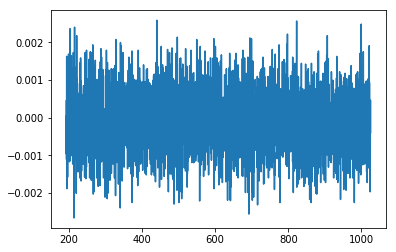

In [18]:
import time as time
initial = time.time()
y,x = ccs.take_data(integration_time=None, num_avg=100, use_background=False)
elapsed_time = time.time()-initial
print(elapsed_time)

1.8024847507476807


In [ ]:
for i in range(3):
    y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
    while x is None:
        time.sleep(15)
    plt.plot(x,y)
    time.sleep(2)

In [ ]:

for i in range(3):
    thread = threading.Thread(target=ccs.take_data(integration_time=None, num_avg=1, use_background=False))
    y,x = 
    plt.plot(x,y)
    time.sleep(2)

In [ ]:
a=0
for i in range(10):
    while a <5:
        try:
            print(i)
            y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
            plt.plot(x,y)
            
        except:
            print('no funca')

In [ ]:
import time
a=0
for i in range(3):
    while a<5:
        try:
            y,x = ccs.take_data(integration_time=None, num_avg=1, use_background=False)
            plt.plot(x,y)
            time.sleep(1)
            break
        except:
            print(a)

In [ ]:
ccs.reset()

In [ ]:
ccs.close()